参考：

1、https://blog.csdn.net/weixin_39886718/article/details/78827339

2、https://www.kaggle.com/dalpozz/in-depth-skewed-data-classif-93-recall-acc-now

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%time

df = pd.read_csv('../input/creditcard.csv')

CPU times: user 2.08 s, sys: 145 ms, total: 2.23 s
Wall time: 2.23 s


In [3]:
df.shape

(284807, 31)

In [4]:
feature = df.drop(['Time', 'Amount', 'Class'], axis=1)
target = df['Class']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.20, random_state=0)

In [6]:
%%time
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

CPU times: user 4.59 s, sys: 26.6 ms, total: 4.62 s
Wall time: 4.62 s


In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.9994908886626171

In [8]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [9]:
confusion_matrix(y_test, y_pred)

array([[56850,    11],
       [   18,    83]])

In [10]:
# 敏感
sensitivity = tp / float((tp + fn))  # Sensitivity
sensitivity

0.8217821782178217

In [11]:
# 特异性
specificity = tn / float((tn + fp))  # Specificity
specificity

0.9998065457870948

In [12]:
fec_indx = dtc.feature_importances_
fec_name = X_train.columns 

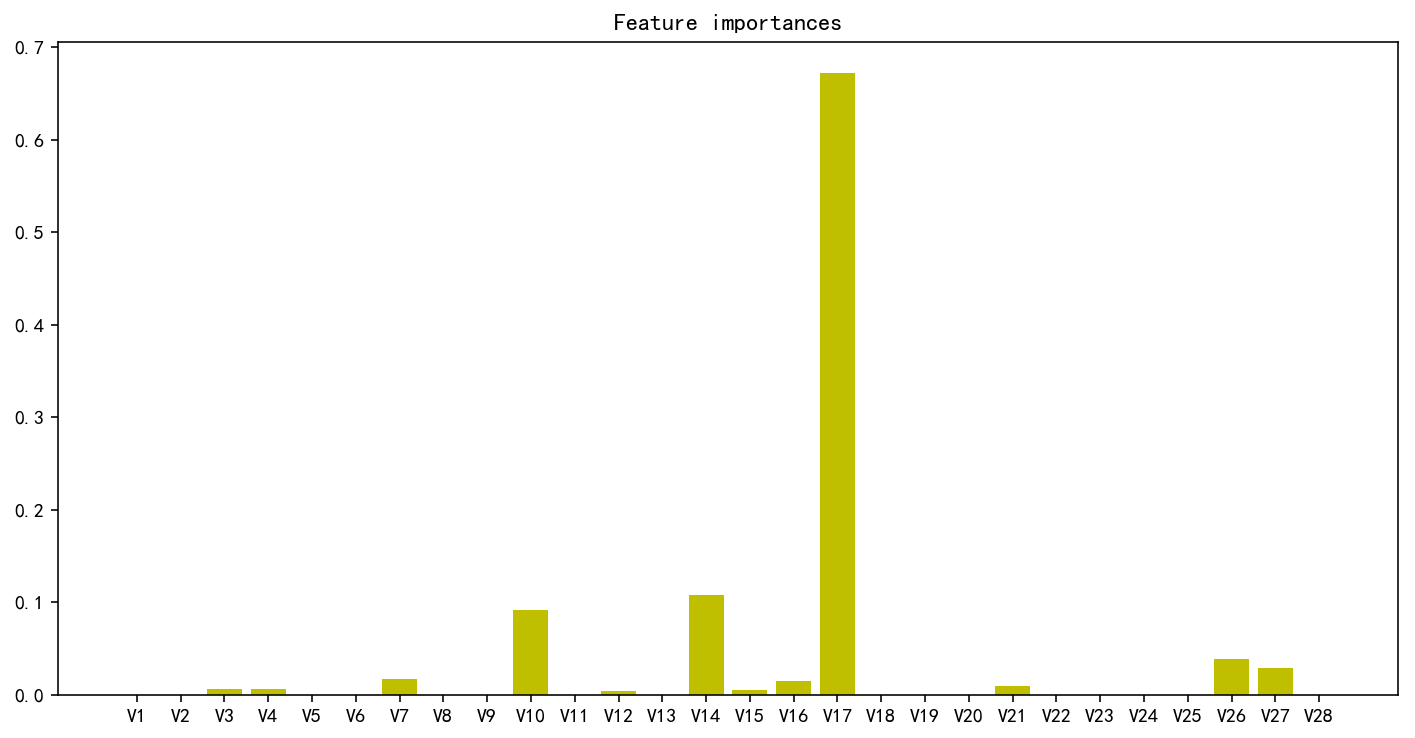

In [13]:
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(np.arange(fec_indx.shape[0]), fec_indx, color='y', align="center")
plt.xticks(np.arange(fec_indx.shape[0]), fec_name)
plt.show()

In [14]:
# 降序，所以前面加负号
top10 = fec_name[np.argsort(-fec_indx)][:10]
top10_df = df[top10]
X_train, X_test, y_train, y_test = train_test_split(
    top10_df, target, test_size=0.20, random_state=0)

In [15]:
imp_dtc = DecisionTreeClassifier(max_depth=8)
imp_dtc.fit(X_train, y_train)
i_pred = imp_dtc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


def print_metrics_result(y_pred, y_test):
    acc = accuracy_score(y_pred, y_test, normalize=True, sample_weight=None)
    print('acc', acc)

    tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
    # 敏感
    sensitivity = tp / float((tp + fn))  # Sensitivity
    print('sensitivity', sensitivity)

    # 特异性
    Specificity = tn / float((tn + fp))  # Specificity
    print('specificity', specificity)

In [17]:
print_metrics_result(i_pred, y_test)

acc 0.9994733330992591
sensitivity 0.9080459770114943
specificity 0.9998065457870948


## PCA

In [18]:
%%time
df = pd.read_csv('../input/creditcard.csv')
feature = df.drop(['Time', 'Amount', 'Class'], axis=1)
target = df['Class']

CPU times: user 2.28 s, sys: 173 ms, total: 2.45 s
Wall time: 2.45 s


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.20, random_state=0)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)

In [21]:
pca_X = X_train
pca_Xt = X_test

In [22]:
pca.fit(pca_X)
pca_X = pca.transform(pca_X)
pca_Xt = pca.transform(pca_Xt)

In [23]:
pca_dtc = DecisionTreeClassifier(max_depth=8)
pca_dtc.fit(pca_X, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
pca_pred = pca_dtc.predict(pca_Xt)
pca_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
print_metrics_result(pca_pred, y_test)

acc 0.9992626663389628
sensitivity 0.8734177215189873
specificity 0.9998065457870948


## LDA 线性判别分析



In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

In [27]:
lda_X = X_train
lda_Xt = X_test
clf.fit(lda_X, y_train)
lda_pred = clf.predict(lda_Xt)

In [28]:
print_metrics_result(lda_pred, y_test)

acc 0.999385555282469
sensitivity 0.875
specificity 0.9998065457870948


## GBDT

In [29]:
params = {
    'n_estimators': 100,
    'max_depth': 4,
    'min_samples_split': 2,
    'learning_rate': 0.01,
    'loss': 'exponential'
}

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(**params)

In [31]:
%%time
gbdt.fit(X_train, y_train)

CPU times: user 2min 26s, sys: 404 ms, total: 2min 27s
Wall time: 2min 27s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [32]:
%%time
y_pre = gbdt.predict(X_test)

CPU times: user 60.4 ms, sys: 4.2 ms, total: 64.6 ms
Wall time: 62.8 ms


In [33]:
print_metrics_result(y_pre, y_test)

acc 0.9982268881008391
sensitivity nan
specificity 0.9998065457870948


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


## XGBoost

In [34]:
params_cv = {
    'gamma': [0, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

gridcv = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic'),
    param_grid=params_cv,
    scoring='roc_auc')  # roc_auc score

In [ ]:
%%time
gridcv.fit(X_train,y_train)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


https://cherishlc.iteye.com/blog/2329604

In [ ]:
gridcv.grid_scores_

In [ ]:
gridcv.best_score_

In [ ]:
gridcv.best_params_

In [ ]:
y_pre=gridcv.predict(Xt)